In [2]:
import pandas as pd

In [3]:
# Veri setini yükleme
df = pd.read_csv("finance_economics_dataset.csv")

In [4]:
# İlk birkaç satırı görüntüleme
df.head(5)

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688


In [5]:
# Veri setinin genel bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   3000 non-null   object 
 1   Stock Index                            3000 non-null   object 
 2   Open Price                             3000 non-null   float64
 3   Close Price                            3000 non-null   float64
 4   Daily High                             3000 non-null   float64
 5   Daily Low                              3000 non-null   float64
 6   Trading Volume                         3000 non-null   int64  
 7   GDP Growth (%)                         3000 non-null   float64
 8   Inflation Rate (%)                     3000 non-null   float64
 9   Unemployment Rate (%)                  3000 non-null   float64
 10  Interest Rate (%)                      3000 non-null   float64
 11  Cons

In [6]:
# Eksik değerleri kontrol etme
df.isnull().sum()

Date                                     0
Stock Index                              0
Open Price                               0
Close Price                              0
Daily High                               0
Daily Low                                0
Trading Volume                           0
GDP Growth (%)                           0
Inflation Rate (%)                       0
Unemployment Rate (%)                    0
Interest Rate (%)                        0
Consumer Confidence Index                0
Government Debt (Billion USD)            0
Corporate Profits (Billion USD)          0
Forex USD/EUR                            0
Forex USD/JPY                            0
Crude Oil Price (USD per Barrel)         0
Gold Price (USD per Ounce)               0
Real Estate Index                        0
Retail Sales (Billion USD)               0
Bankruptcy Rate (%)                      0
Mergers & Acquisitions Deals             0
Venture Capital Funding (Billion USD)    0
Consumer Sp

In [11]:
import matplotlib.pyplot as plt

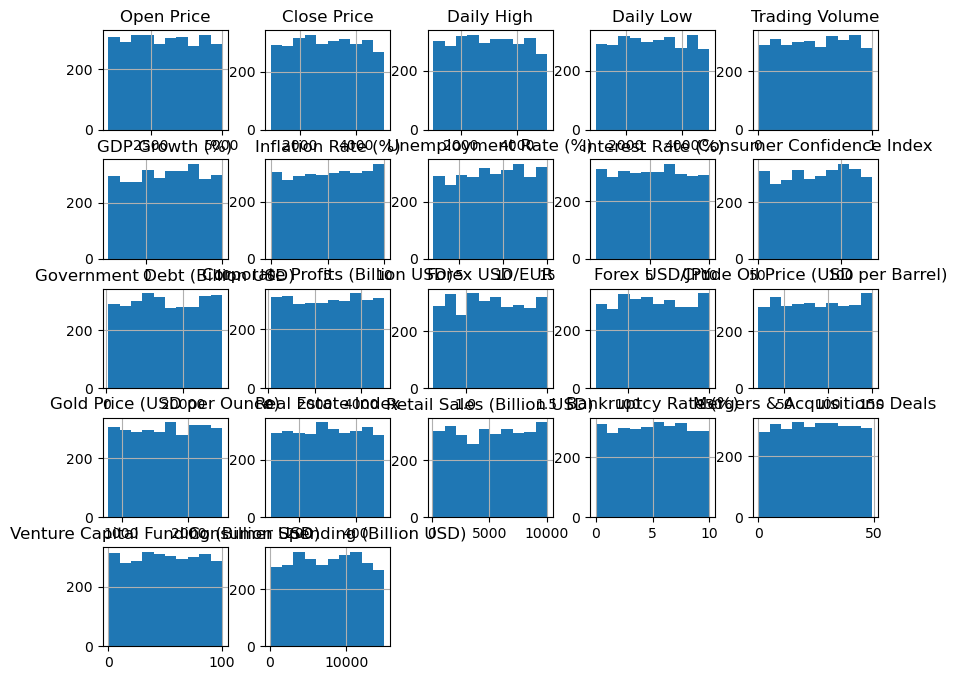

In [12]:
df.hist(figsize=(10, 8))
plt.show()

In [15]:
print(df.columns)

Index(['Date', 'Stock Index', 'Open Price', 'Close Price', 'Daily High',
       'Daily Low', 'Trading Volume', 'GDP Growth (%)', 'Inflation Rate (%)',
       'Unemployment Rate (%)', 'Interest Rate (%)',
       'Consumer Confidence Index', 'Government Debt (Billion USD)',
       'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY',
       'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)',
       'Real Estate Index', 'Retail Sales (Billion USD)',
       'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals',
       'Venture Capital Funding (Billion USD)',
       'Consumer Spending (Billion USD)'],
      dtype='object')


In [19]:
from sklearn.model_selection import train_test_split
# Özellikler ve hedef değişken seçimi
features = ["Open Price", "Trading Volume", "Interest Rate (%)", "GDP Growth (%)", "Inflation Rate (%)"]
target = "Close Price"  # Tahmin etmek istediğin değişkeni buraya yaz

In [20]:
# Eğitim ve test setlerine ayırma
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Veri başarıyla ayrıldı!")

Veri başarıyla ayrıldı!


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [22]:
# Karar ağacı modelini oluşturma ve eğitme
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [23]:
# Tahmin yapma
y_pred_tree = tree_model.predict(X_test)

In [24]:
# Model değerlendirme
mae_tree = mean_absolute_error(y_test, y_pred_tree)
print(f"Karar Ağacı Ortalama Mutlak Hata: {mae_tree}")

Karar Ağacı Ortalama Mutlak Hata: 35.84118333333334


In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
# Rastgele Orman modelini oluşturma ve eğitme
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Tahmin yapma
y_pred_rf = rf_model.predict(X_test)

In [28]:
# Model değerlendirme
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Rastgele Orman Ortalama Mutlak Hata: {mae_rf}")

Rastgele Orman Ortalama Mutlak Hata: 27.211581333333356


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
# Lineer regresyon modelini oluşturma ve eğitme
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Tahmin yapma
y_pred_lr = lr_model.predict(X_test)

In [32]:
# Model değerlendirme
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Lineer Regresyon Ortalama Mutlak Hata: {mae_lr}")

Lineer Regresyon Ortalama Mutlak Hata: 25.88446044283727


In [33]:
from sklearn.metrics import r2_score

# R² skorlarını hesaplama
r2_tree = r2_score(y_test, y_pred_tree)
r2_rf = r2_score(y_test, y_pred_rf)
r2_lr = r2_score(y_test, y_pred_lr)

# Sonuçları tablo şeklinde gösterme
comparison = {
    "Model": ["Karar Ağacı", "Rastgele Orman", "Lineer Regresyon"],
    "MAE": [mae_tree, mae_rf, mae_lr],
    "R² Skoru": [r2_tree, r2_rf, r2_lr]
}

import pandas as pd
comparison_df = pd.DataFrame(comparison)
print(comparison_df)

              Model        MAE  R² Skoru
0       Karar Ağacı  35.841183  0.998625
1    Rastgele Orman  27.211581  0.999237
2  Lineer Regresyon  25.884460  0.999348
